In [2]:
import sys
sys.path.append('../')

#### Preview the images:

In [3]:
local_dir = "../00000/" #@param

from PIL import Image

def image_grid(imgs, rows, cols, resize=256):

    if resize is not None:
        imgs = [img.resize((resize, resize)) for img in imgs]
    w, h = imgs[0].size
    grid = Image.new("RGB", size=(cols * w, rows * h))
    grid_w, grid_h = grid.size

    for i, img in enumerate(imgs):
        grid.paste(img, box=(i % cols * w, i // cols * h))
    return grid


Initialize `accelerate`: Used to speed the training process for models with large number of parameters

In [4]:
# import locale
# locale.getpreferredencoding = lambda: "UTF-8"

!accelerate config default

accelerate configuration saved at /home/khanhnq/.cache/huggingface/accelerate/default_config.yaml


In [5]:
from huggingface_hub import login
import os
import dotenv

dotenv.load_dotenv()
TOKEN = os.getenv("HUGGINGFACE_TOKEN")

login(token=TOKEN)


The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.


Token is valid (permission: fineGrained).
Your token has been saved to /home/khanhnq/.cache/huggingface/token
Login successful


In [6]:
from huggingface_hub import notebook_login
notebook_login()

In [7]:
import wandb
KEY = os.getenv("WANDB_API_KEY")
wandb.login(key=KEY)

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: qkhanh711. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /home/khanhnq/.netrc


True

In [7]:
#!/usr/bin/env bash
!rm ../00000/*.jsonl 
!accelerate launch ../diffuserss/train_dreambooth_lora_sd3.py \
--pretrained_model_name_or_path="stabilityai/stable-diffusion-3-medium-diffusers" \
--instance_data_dir="../00000" \
--output_dir="TS_LoRA_sd3" \
--mixed_precision="bf16" \
--instance_prompt "a photo of TOK traffic sign, 00000 with a ocean waves in background" \
--resolution=512 \
--train_batch_size=2 \
--gradient_accumulation_steps=4 \
--learning_rate=0.0002 \
--report_to="wandb" \
--lr_scheduler="linear" \
--lr_warmup_steps=0 \
--max_train_steps=500 \
--weighting_scheme="logit_normal" \
--seed="42" \
--use_8bit_adam \
--gradient_checkpointing \
--prior_generation_precision="bf16"

In [8]:
from huggingface_hub import whoami
from pathlib import Path
output_dir = "00000_LoRA_sd3" #@param
username = whoami(token=Path("/root/.cache/huggingface/"))["name"]
repo_id = f"{username}/{output_dir}"
print(f"Your model is available at https://huggingface.co/{repo_id}")

Your model is available at https://huggingface.co/Nyanmaru/00000_LoRA_sd3


In [9]:
import locale
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')


'en_US.UTF-8'

In [10]:
import sys
sys.path.append('..')
from diffuserss import train_sd3
from huggingface_hub import upload_folder, create_repo

repo_id = create_repo(repo_id, exist_ok=True).repo_id

train_sd3(
    repo_id = repo_id,
    images=[],
    base_model="stabilityai/stable-diffusion-3-medium-diffusers",
    train_text_encoder=False,
    instance_prompt="a photo of TOK uneven road traffic sign ",
    validation_prompt=None,
    repo_folder=output_dir,
)

upload_folder(
    repo_id=repo_id,
    folder_path=output_dir,
    commit_message="End of training",
    ignore_patterns=["step_*", "epoch_*"],
)

2024-09-17 10:59:41.115557: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-17 10:59:41.911734: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


CommitInfo(commit_url='https://huggingface.co/Nyanmaru/00000_LoRA_sd3/commit/bd20fea0b021e3874e783064f17ab26724e5d8b9', commit_message='End of training', commit_description='', oid='bd20fea0b021e3874e783064f17ab26724e5d8b9', pr_url=None, pr_revision=None, pr_num=None)

In [11]:
from IPython.display import display, Markdown

link_to_model = f"https://huggingface.co/{repo_id}"
display(Markdown("### Your model has finished training.\nAccess it here: {}".format(link_to_model)))

### Your model has finished training.
Access it here: https://huggingface.co/Nyanmaru/00000_LoRA_sd3

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

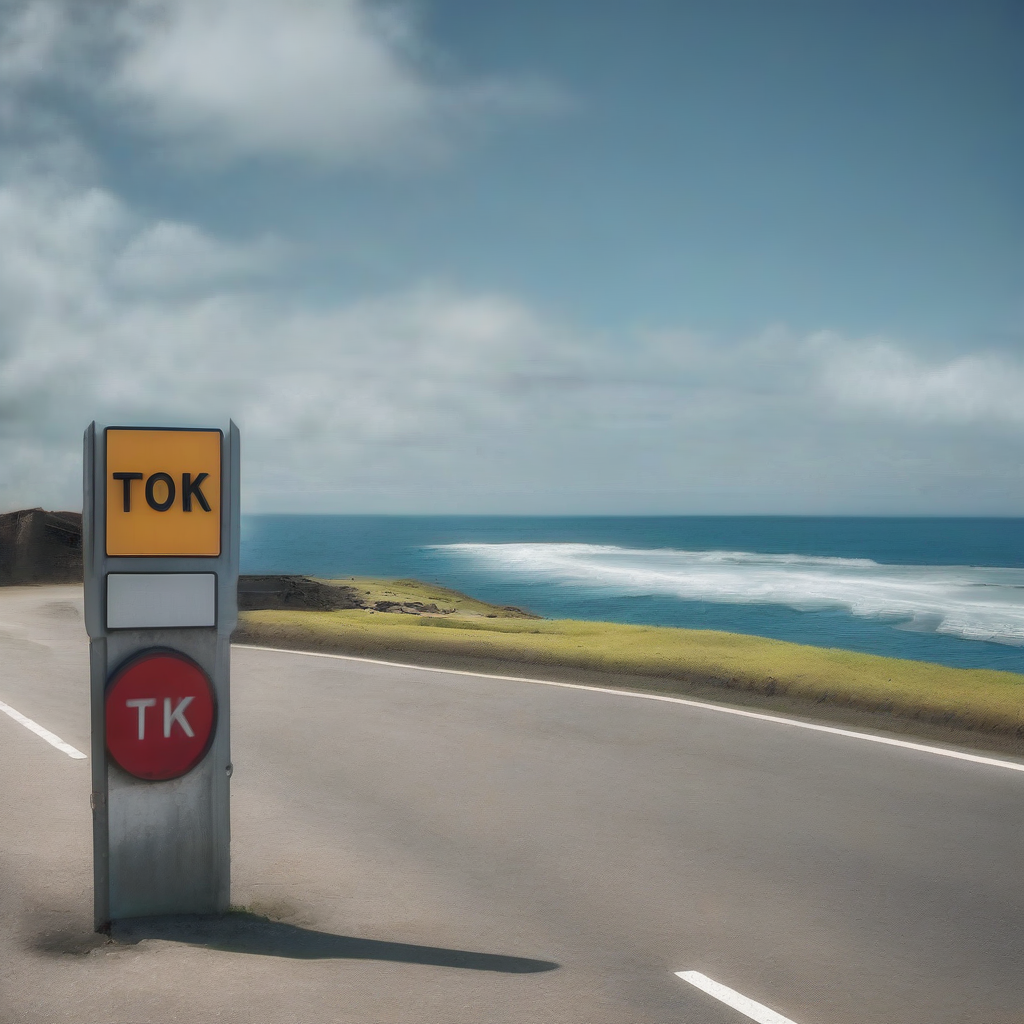

: 

In [7]:
# import torch
# from diffusers import DiffusionPipeline, AutoencoderKL

# vae = AutoencoderKL.from_pretrained("madebyollin/sdxl-vae-fp16-fix", torch_dtype=torch.float16)
# pipe = DiffusionPipeline.from_pretrained(
#     "stabilityai/stable-diffusion-xl-base-1.0",
#     vae=vae,
#     torch_dtype=torch.float16,
#     variant="fp16",
#     use_safetensors=True
# )
# pipe.load_lora_weights("../TS_LoRA/pytorch_lora_weights.safetensors")
# _ = pipe.to("cuda")

# prompt = "a photo of TOK 'uneven-road-sign', with ocean background"
# image = pipe(prompt=prompt, num_inference_steps=25).images[0]
# image

2024-09-26 10:07:09.904481: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-26 10:07:10.654448: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Loading pipeline components...:   0%|          | 0/9 [00:00<?, ?it/s]

You set `add_prefix_space`. The tokenizer needs to be converted from the slow tokenizers


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

The config attributes {'block_out_channels': [64, 64, 64, 64]} were passed to AutoencoderTiny, but are not expected and will be ignored. Please verify your config.json configuration file.


  0%|          | 0/25 [00:00<?, ?it/s]

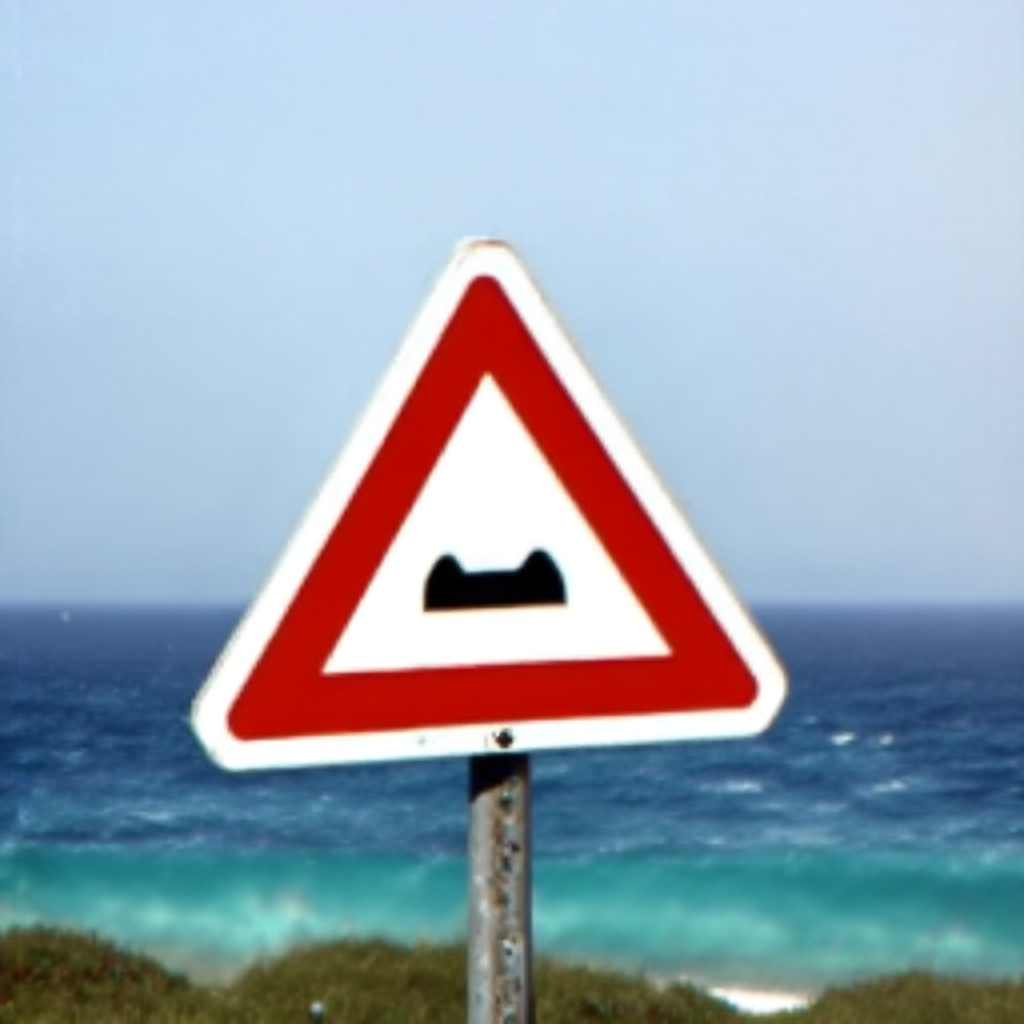

In [1]:

import torch
from diffusers import StableDiffusion3Pipeline, AutoencoderTiny

pipe = StableDiffusion3Pipeline.from_pretrained(
    "stabilityai/stable-diffusion-3-medium-diffusers", torch_dtype=torch.float16
)
pipe.vae = AutoencoderTiny.from_pretrained("madebyollin/taesd3", torch_dtype=torch.float16)
pipe.load_lora_weights("TS_LoRA_sd3/pytorch_lora_weights.safetensors")
pipe = pipe.to("cuda")

prompt = "a photo of TOK 'uneven-road-sign', with ocean background" # @param

image = pipe(prompt=prompt, num_inference_steps=25).images[0]
image

Loading pipeline components...:   0%|          | 0/9 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

The config attributes {'block_out_channels': [64, 64, 64, 64]} were passed to AutoencoderTiny, but are not expected and will be ignored. Please verify your config.json configuration file.


  0%|          | 0/25 [00:00<?, ?it/s]

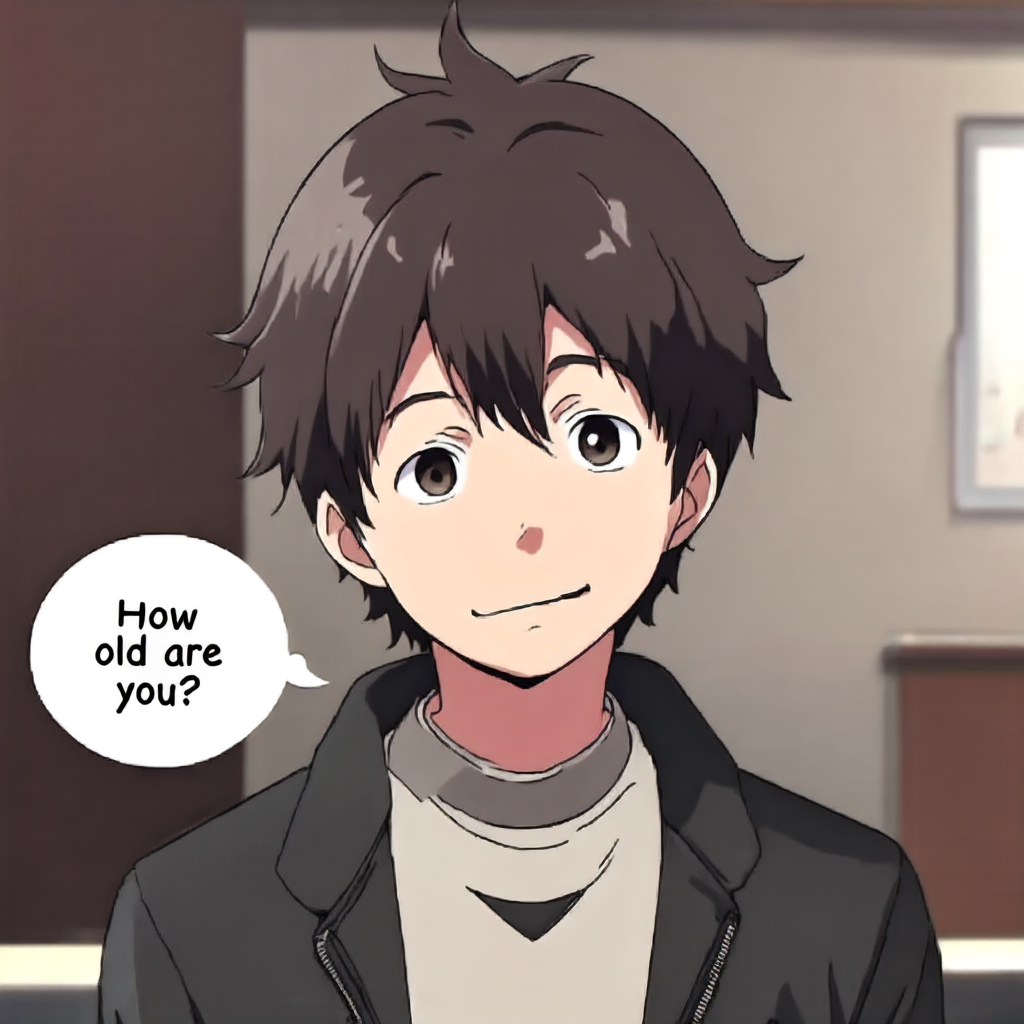

In [35]:

import torch
from diffusers import StableDiffusion3Pipeline, AutoencoderTiny

pipe = StableDiffusion3Pipeline.from_pretrained(
    "stabilityai/stable-diffusion-3-medium-diffusers", torch_dtype=torch.float16
)
pipe.vae = AutoencoderTiny.from_pretrained("madebyollin/taesd3", torch_dtype=torch.float16)
pipe.load_lora_weights("TS_LoRA_sd3/pytorch_lora_weights.safetensors")
pipe = pipe.to("cuda")

prompt = "a anime boy with 'how old are you?' in bubble chat" # @param

image = pipe(prompt=prompt, num_inference_steps=25).images[0]
image

  0%|          | 0/25 [00:00<?, ?it/s]

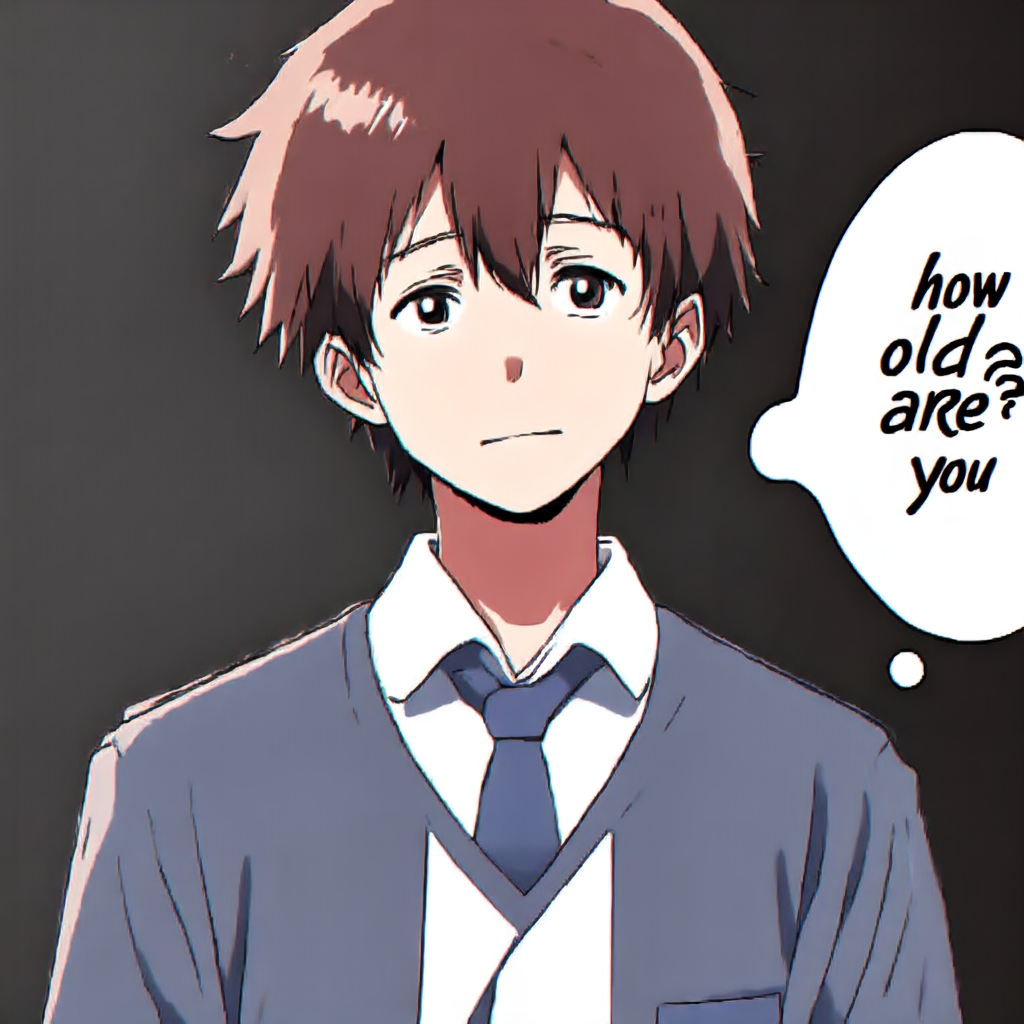

In [36]:
prompt = "a anime boy with 'how old are you?' in bubble chat" # @param

image = pipe(prompt=prompt, num_inference_steps=25).images[0]
image

  0%|          | 0/25 [00:00<?, ?it/s]

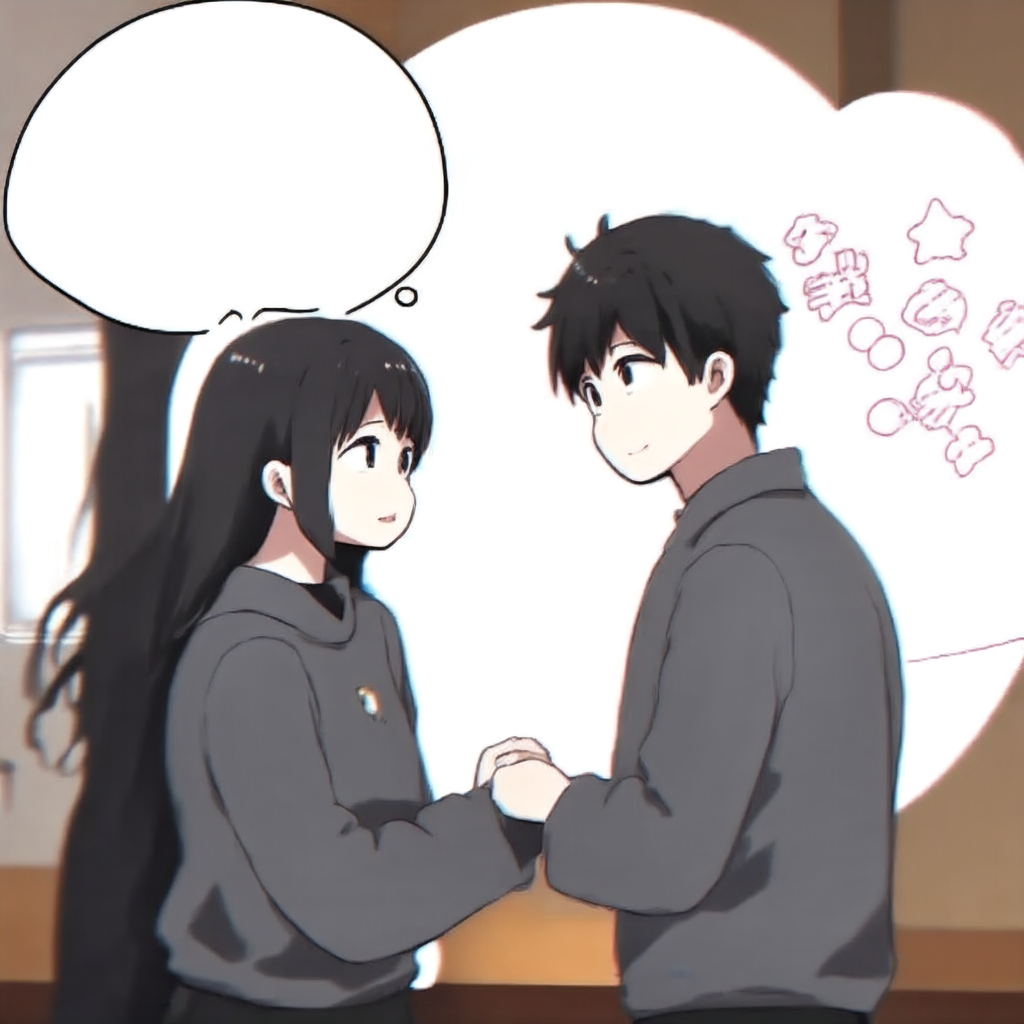

In [3]:
prompt = "a anime couple talk each other with blank bubble chat in  upper conner" # @param

image = pipe(prompt=prompt, num_inference_steps=25).images[0]
image

In [11]:
import torch
torch.__version__

'2.1.0'

In [12]:
import torch
from torch import autocast
from diffusers import StableDiffusionPipeline

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

pipe = StableDiffusionPipeline.from_pretrained(
    'hakurei/waifu-diffusion',
    torch_dtype=torch.float32
).to(device)


model_index.json:   0%|          | 0.00/577 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.89k [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/819 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/620 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/518 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/601 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/home/khanhnq/anaconda3/envs/GAI/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


  0%|          | 0/50 [00:00<?, ?it/s]

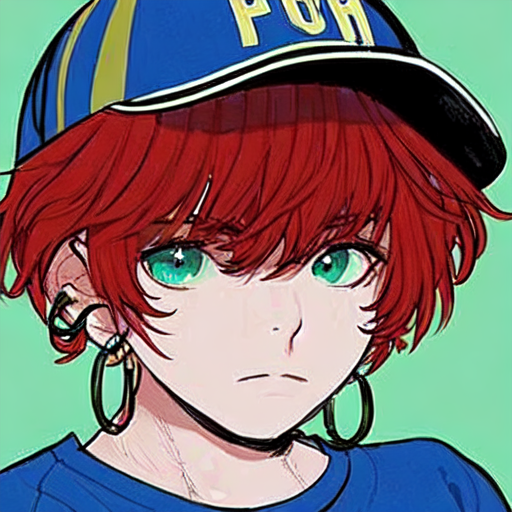

In [18]:
prompt = "1kid, aqua eyes, baseball cap, red hair, closed mouth, earrings, green background \
        , hat, hoop earrings, jewelry, looking at viewer, shirt, short hair, simple background, solo, upper body, blue shirt, \
        bubble chat"
with autocast("cpu"):
    image = pipe(prompt, guidance_scale=6)["images"][0]
image
